In [5]:
import pandas as pd
import numpy as np
import string
from IPython.display import Image

In [6]:
df=pd.read_csv('Reddit_Tokenization.csv')
df

,comment,hate_speech,words,lemmatized_comment
0,subsection retarded hungarians ohh boy brace l...,1,"['subsection', 'retarded', 'hungarians', 'ohh'...",subsection retard hungarians ohh boy brace liv...
1,hiii just got work Foundation and grounding ma...,0,"['hiii', 'just', 'got', 'work', 'Foundation', ...",hiii just get work Foundation and ground mainl...
2,wow guess soyboys every country,0,"['wow', 'guess', 'soyboys', 'every', 'country']",wow guess soyboys every country
3,owen benjamins soyboy song goes every country ...,0,"['owen', 'benjamins', 'soyboy', 'song', 'goes'...",owen benjamins soyboy song go every country amaze
4,yall hear sumn means live small town rn for w...,0,"['yall', 'hear', 'sumn', 'means', 'live', 'sma...",yall hear sumn mean live small town rn for wor...
...,...,...,...,...
22206,op stop faggot post videos next time hard,1,"['op', 'stop', 'faggot', 'post', 'videos', 'ne...",op stop faggot post videos next time hard
22207,minute long video top hate champagne goes need...,0,"['minute', 'long', 'video', 'top', 'hate', 'ch...",minute long video top hate champagne go need g...
22208,clue whos ecelebs are point time need get alo...,1,"['clue', 'whos', 'ecelebs', 'are', 'point', 't...",clue whos ecelebs be point time need get along...
22209,didn’t insult you insult me,0,"['didn', '’', 't', 'insult', 'you', 'insult', ...",didn ’ t insult you insult me


In [7]:
df['comment'][42]

'ah yeah can see mean also thanks empathizing sucked made through longer life sorry tone little cunty everyone kinda certain ways replying based subreddit on heh'

# word Embeddings

##### Word Embedding is an approach for representing words and documents. Word Embedding or Word Vector is a numeric vector input that represents a word in a lower-dimensional space. It allows words with similar meanings to have a similar representation.ed.

### # Need for Word Embedding?


1.To reduce dimensionality

2.To use a word to predict the words around it.

3.Inter-word semantics must be captured.

### # Approaches for Text Representation

#### Traditional approach:

1.Label & one-hot encoding

2.Bag-of-words

3.Term frequency-inverse document frequency (TF-IDF)


#### 1.Label & One-hot encoding

##### label & one-hot encoding is the process of turning categorical factors into a numerical structure that machine learning algorithms can readily process.It functions by representing each category in a feature as a binary vector of 1s and 0s.

In [8]:
text = "Hello! Welcome to Educative. Happy learning."

# Tokenize the text into words
words = text.split()

# Create a set to get unique words (vocabulary)
vocabulary = set(words)

# Generate one-hot encoded vectors for each word in the vocabulary
one_hot_encoded = []
for word in vocabulary:
    # Create a list of zeros with the length of the vocabulary
    encoding = [0] * len(vocabulary)
    
    # Get the index of the word in the vocabulary
    index = list(vocabulary).index(word)
    
    # Set the value at the index to 1 to indicate word presence
    encoding[index] = 1
    one_hot_encoded.append((word, encoding))

# Print the one-hot encoded vectors
for word, encoding in one_hot_encoded:
    print(f"{word}: {encoding}")

print(vocabulary)

Hello!: [1, 0, 0, 0, 0, 0]
Happy: [0, 1, 0, 0, 0, 0]
learning.: [0, 0, 1, 0, 0, 0]
Educative.: [0, 0, 0, 1, 0, 0]
to: [0, 0, 0, 0, 1, 0]
Welcome: [0, 0, 0, 0, 0, 1]
{'Hello!', 'Happy', 'learning.', 'Educative.', 'to', 'Welcome'}


In [9]:
vocabulary = set()
_ = df['words'].apply(lambda x: vocabulary.update(x))

vocab_list = list(vocabulary)

def one_hot_encode(tokens, vocab_list):
    encoding = [0] * len(vocab_list)
    
    for token in tokens:
        index = vocab_list.index(token)
        
        encoding[index] = 1
    return encoding

df['one_hot_encoded'] = df['words'].apply(lambda x: one_hot_encode(x, vocab_list))

df

,comment,hate_speech,words,lemmatized_comment,one_hot_encoded
0,subsection retarded hungarians ohh boy brace l...,1,"['subsection', 'retarded', 'hungarians', 'ohh'...",subsection retard hungarians ohh boy brace liv...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,hiii just got work Foundation and grounding ma...,0,"['hiii', 'just', 'got', 'work', 'Foundation', ...",hiii just get work Foundation and ground mainl...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,wow guess soyboys every country,0,"['wow', 'guess', 'soyboys', 'every', 'country']",wow guess soyboys every country,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,owen benjamins soyboy song goes every country ...,0,"['owen', 'benjamins', 'soyboy', 'song', 'goes'...",owen benjamins soyboy song go every country amaze,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,yall hear sumn means live small town rn for w...,0,"['yall', 'hear', 'sumn', 'means', 'live', 'sma...",yall hear sumn mean live small town rn for wor...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...
22206,op stop faggot post videos next time hard,1,"['op', 'stop', 'faggot', 'post', 'videos', 'ne...",op stop faggot post videos next time hard,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
22207,minute long video top hate champagne goes need...,0,"['minute', 'long', 'video', 'top', 'hate', 'ch...",minute long video top hate champagne go need g...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
22208,clue whos ecelebs are point time need get alo...,1,"['clue', 'whos', 'ecelebs', 'are', 'point', 't...",clue whos ecelebs be point time need get along...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
22209,didn’t insult you insult me,0,"['didn', '’', 't', 'insult', 'you', 'insult', ...",didn ’ t insult you insult me,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [21]:
###### from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

df['encoded_comment'] = label_encoder.fit_transform(df['comment'])
df.head()

,comment,hate_speech,words,lemmatized_comment,one_hot_encoded,encoded_comment
0,subsection retarded hungarians ohh boy brace l...,1,"['subsection', 'retarded', 'hungarians', 'ohh'...",subsection retard hungarians ohh boy brace liv...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",17465
1,hiii just got work Foundation and grounding ma...,0,"['hiii', 'just', 'got', 'work', 'Foundation', ...",hiii just get work Foundation and ground mainl...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",8209
2,wow guess soyboys every country,0,"['wow', 'guess', 'soyboys', 'every', 'country']",wow guess soyboys every country,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",20782
3,owen benjamins soyboy song goes every country ...,0,"['owen', 'benjamins', 'soyboy', 'song', 'goes'...",owen benjamins soyboy song go every country amaze,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",13739
4,yall hear sumn means live small town rn for w...,0,"['yall', 'hear', 'sumn', 'means', 'live', 'sma...",yall hear sumn mean live small town rn for wor...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",877


In [20]:
df['encoded_comment']

0        17465
1         8209
2        20782
3        13739
4          877
         ...  
22206    13659
22207    11971
22208     3812
22209     4670
22210    10843
Name: encoded_comment, Length: 22211, dtype: int32

#### Drawbacks :

1.similar words doesn't have similar representation(it cannot catches the meaning of the word)

2.it consumes more memory and compute resources

3.For undefined words no option available (OUT-OF-VOCABULARY)

4.no fixed length representation

#### 2.Bag-of-words

##### Bag of Words (BoW) is a Natural Language Processing strategy for converting a text document into numbers that can be used by a computer program. This method involves converting text into a vector based on the frequency of words in the text,without considering the order or context of the words.

In [25]:
corpus=[
'i really disappointed product', 
'i would use again', 
'it really bad feature', 
'i love product', 
'it good feature'
]
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

X = vectorizer.fit_transform(corpus)

feature_names = vectorizer.get_feature_names_out()

X_array = X.toarray()

print("Unique Word List: \n", feature_names)
print("Bag of Words Matrix: \n", X_array)

Unique Word List: 
 ['again' 'bad' 'disappointed' 'feature' 'good' 'it' 'love' 'product'
 'really' 'use' 'would']
Bag of Words Matrix: 
 [[0 0 1 0 0 0 0 1 1 0 0]
 [1 0 0 0 0 0 0 0 0 1 1]
 [0 1 0 1 0 1 0 0 1 0 0]
 [0 0 0 0 0 0 1 1 0 0 0]
 [0 0 0 1 1 1 0 0 0 0 0]]


In [23]:
text = pd.DataFrame(data=X_array, columns=feature_names, index=corpus)
text

,again,bad,disappointed,feature,good,it,love,product,really,use,would
i really disappointed product,0,0,1,0,0,0,0,1,1,0,0
i would use again,1,0,0,0,0,0,0,0,0,1,1
it really bad feature,0,1,0,1,0,1,0,0,1,0,0
i love product,0,0,0,0,0,0,1,1,0,0,0
it good feature,0,0,0,1,1,1,0,0,0,0,0


In [26]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the "CountVectorizer" object, which is scikit-learn's
# bag of words tool.  
vectorizer = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 5000) 


In [29]:

# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of 
# strings.
train_data_features = vectorizer.fit_transform(df['words'])

# Numpy arrays are easy to work with, so convert the result to an 
# array
train_dat = vectorizer.fit_transform(df['words'])

In [37]:
print(train_dat)

  (0, 3727)	1
  (0, 573)	1
  (0, 872)	1
  (0, 4617)	1
  (0, 2035)	1
  (0, 2113)	1
  (1, 2425)	2
  (1, 1947)	1
  (1, 4930)	1
  (1, 1809)	1
  (1, 207)	1
  (1, 2673)	1
  (1, 1995)	1
  (1, 2217)	1
  (1, 4958)	1
  (1, 4704)	2
  (1, 4274)	1
  (1, 4023)	1
  (1, 415)	1
  (1, 4616)	1
  (1, 1751)	1
  (1, 4858)	1
  (1, 1546)	1
  (1, 489)	1
  (1, 815)	1
  :	:
  (22207, 3335)	1
  (22207, 177)	1
  (22207, 4750)	1
  (22207, 2819)	1
  (22207, 3438)	1
  (22208, 1904)	1
  (22208, 2897)	1
  (22208, 3833)	1
  (22208, 847)	1
  (22208, 3296)	1
  (22208, 2947)	1
  (22208, 4512)	1
  (22208, 4100)	1
  (22208, 1843)	1
  (22208, 3335)	1
  (22208, 177)	1
  (22208, 3725)	1
  (22208, 268)	1
  (22208, 3438)	1
  (22209, 4985)	1
  (22209, 2739)	1
  (22209, 1250)	1
  (22209, 2307)	2
  (22210, 2577)	1
  (22210, 2614)	1


#### 3.Term frequency-inverse document frequency (TF-IDF)

##### TF-IDF stands for Term Frequency Inverse Document Frequency of records. It can be defined as the calculation of how relevant a word in a series or corpus is to a text. The meaning increases proportionally to the number of times in the text a word appears but is compensated by the word frequency in the corpus (data-set).

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
import itertools
corpus = [
    'really disappointed product',
    'would use again',
    'really bad feature',
    'love product',
    'good feature'
]
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)
terms = tfidf_vectorizer.get_feature_names_out()
data = pd.DataFrame(tfidf_matrix.toarray(), columns=terms)
print(data)

     again       bad  disappointed   feature      good      love   product  \
0  0.00000  0.000000      0.659118  0.000000  0.000000  0.000000  0.531772   
1  0.57735  0.000000      0.000000  0.000000  0.000000  0.000000  0.000000   
2  0.00000  0.659118      0.000000  0.531772  0.000000  0.000000  0.000000   
3  0.00000  0.000000      0.000000  0.000000  0.000000  0.778283  0.627914   
4  0.00000  0.000000      0.000000  0.627914  0.778283  0.000000  0.000000   

     really      use    would  
0  0.531772  0.00000  0.00000  
1  0.000000  0.57735  0.57735  
2  0.531772  0.00000  0.00000  
3  0.000000  0.00000  0.00000  
4  0.000000  0.00000  0.00000  


In [39]:
texts = np.array(df['words']) #text contents in dataframe to array for processing
vocab_length = len(list(itertools.chain.from_iterable(texts))) #concatenate all the texts and tokenize the whole corpus

In [42]:
vectorizer = TfidfVectorizer(ngram_range = (1,3), max_features = vocab_length) #make Tfidf Vectorizer
tfidf_encodings = vectorizer.fit_transform(df['words']) #encode the text
                

In [43]:
print(tfidf_encodings)

  (0, 341004)	0.17283382709810916
  (0, 327611)	0.17283382709810916
  (0, 790664)	0.17283382709810916
  (0, 136298)	0.17283382709810916
  (0, 97001)	0.17283382709810916
  (0, 436688)	0.17283382709810916
  (0, 91881)	0.17283382709810916
  (0, 91142)	0.17283382709810916
  (0, 524889)	0.17283382709810916
  (0, 349793)	0.17283382709810916
  (0, 634832)	0.17283382709810916
  (0, 729060)	0.17283382709810916
  (0, 726684)	0.17283382709810916
  (0, 341003)	0.17283382709810916
  (0, 327610)	0.17283382709810916
  (0, 790663)	0.17283382709810916
  (0, 136297)	0.16604018186272926
  (0, 97000)	0.17283382709810916
  (0, 436687)	0.17283382709810916
  (0, 91880)	0.17283382709810916
  (0, 91141)	0.17283382709810916
  (0, 524888)	0.16604018186272926
  (0, 349792)	0.17283382709810916
  (0, 634831)	0.17283382709810916
  (0, 729059)	0.17283382709810916
  :	:
  (22208, 27504)	0.09831247389986726
  (22208, 576841)	0.09791151235698062
  (22208, 277948)	0.06094940383406641
  (22208, 699629)	0.06833096788699904

##### DRAWBACKS :

- TF-IDF is based on the bag-of-words (BoW) model, therefore it does not capture position in text, semantics, co-occurrences in different documents, etc.For this reason, TF-IDF is only useful as a lexical level feature
- Cannot capture semantics (e.g. as compared to topic models, word embeddings)

#### Neural approach

- Word2vec

#### 1.Word2vec

##### Word2Vec is a shallow neural network model that learns to represent words in a continuous vector space.Word2Vec aims to capture semantic relationships between words based on their co-occurrence patterns in a large corpus of text data. 

How Does Word2Vec Work? 

5Word2Vec employs two main architectures: Continuous Bag of Words (CBOW) and Skip-gram

In [131]:
from gensim.models import Word2Vec
from gensim.models import Word2Vec, KeyedVectors
from PIL import Image
import gensim 

In [92]:
# Train a Word2Vec model
model = Word2Vec(vector_size=100, window=5, min_count=2, workers=4)

In [155]:
response=df.lemmatized_comment.apply(gensim.utils.simple_preprocess)
response

0        [subsection, retard, hungarians, ohh, boy, bra...
1        [hiii, just, get, work, foundation, and, groun...
2                    [wow, guess, soyboys, every, country]
3        [owen, benjamins, soyboy, song, go, every, cou...
4        [yall, hear, sumn, mean, live, small, town, rn...
                               ...                        
22206    [op, stop, faggot, post, videos, next, time, h...
22207    [minute, long, video, top, hate, champagne, go...
22208    [clue, whos, ecelebs, be, point, time, need, g...
22209                      [didn, insult, you, insult, me]
22210                                          [live, lie]
Name: lemmatized_comment, Length: 22211, dtype: object

In [156]:
# Train the model
model.build_vocab(response, progress_per=1000)
model.train(response, total_examples=model.corpus_count, epochs=model.epochs)

(2430885, 2661385)

In [160]:
model.wv["cricket"]

array([-0.02068298,  0.01191224,  0.07230128,  0.02245717, -0.01192104,
       -0.15915775,  0.01898245,  0.18044107,  0.00567495,  0.00823105,
       -0.08638316, -0.14585842, -0.07317681,  0.01877687,  0.0124933 ,
       -0.0558001 ,  0.0474393 , -0.17775115,  0.08208919, -0.13039687,
        0.03617715,  0.06840298,  0.11372822, -0.03005864,  0.04812512,
       -0.02817018, -0.07790791, -0.03560887, -0.11987568,  0.00696803,
        0.05610387,  0.01378112,  0.03910853, -0.04205949,  0.02840622,
        0.08076847,  0.00244615, -0.11745544, -0.02309835, -0.17507766,
        0.02386563, -0.10211297, -0.07176555, -0.03399507,  0.1165173 ,
       -0.05739591, -0.14765352,  0.03251317,  0.03010095,  0.10404804,
        0.02192598, -0.08309211, -0.04269912,  0.00925407, -0.0628392 ,
        0.07573434,  0.07382011, -0.02303495, -0.074734  , -0.01760018,
        0.01726067,  0.0402355 , -0.06947735,  0.03714859, -0.09429638,
        0.06457447, -0.02486529,  0.04020101, -0.09292048,  0.01

In [193]:
model.wv.most_similar("political", topn=5)

[('media', 0.7315633296966553),
 ('ethnicities', 0.6619980335235596),
 ('party', 0.6610884070396423),
 ('politics', 0.659528374671936),
 ('science', 0.6510244011878967)]

In [177]:
model.wv.similarity(w1="women", w2="men")

0.79922634

#### DrawBacks:

- How to learn the representation for out-of-vocabulary words.
- How to separate some opposite word pairs. For example, “good” and “bad” are usually located very close to each other in the vector space, which may limit the performance of word vectors in NLP tasks like sentiment analysis.

#### WordCloud

In [132]:
reddit_mask=np.array(Image.open('./reddit.png'))

In [143]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc=WordCloud(background_color="black",
             height=800,
             width=800,
            contour_width = 2,
     contour_color = 'black').generate(''.join(df['words']))


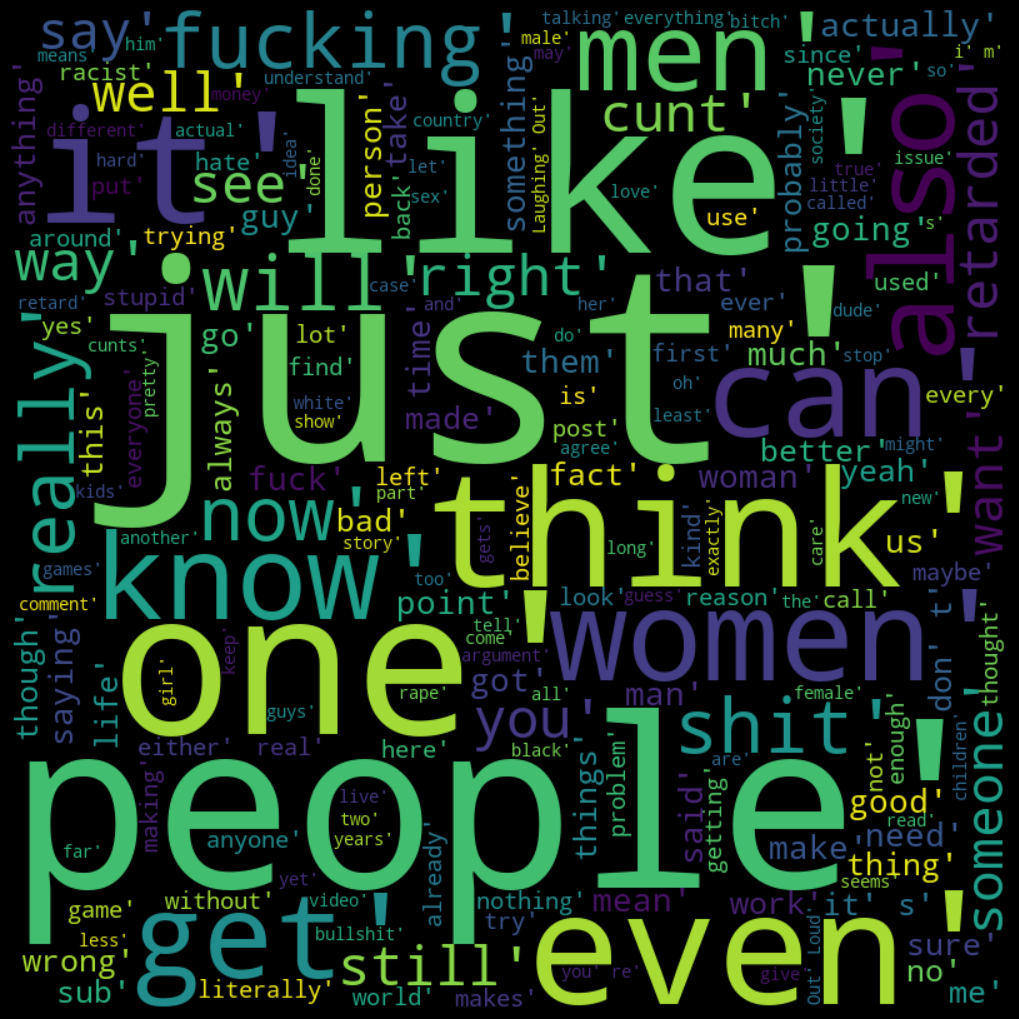

In [144]:
plt.figure(figsize=(20,10),facecolor='k')
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()